*Contenuti*
===
- [Il dataset *Titanic*](#Il-dataset-Titanic)
- [La libreria Pandas](#La-libreria-Pandas)
    - [*Series*, accesso, slicing e rimozione](#Series,-accesso,-slicing-e-rimozione)  
    - [La libreria *seaborn*](#La-libreria-seaborn)
    - [La funzione *groupby*](#La-funzione-groupby)
        - [*Esercizio 1*](#Esercizio-1)
    - [Codifica *one-hot*](#Codifica-one-hot)
    - [Costruzione di nuove colonne](#Costruzione-di-nuove-colonne)
        - [*Esercizio 2*](#Esercizio-2)
        - [*Esercizio 3*](#Esercizio-3)

Il dataset *Titanic*
===

Finora abbiamo ottenuto dati:

- generandoli casualmente
- importandoli dai toy dataset di sklearn.

In entrambi i casi i dati erano già in forma numerica, pronti per i modelli di machine learning. Più realisticamente, i dataset contengono dati di tipo misto, e sono salvati in formato .csv.

Quello su cui lavoreremo in questo notebook è preso da *Kaggle*. Kaggle è un hub per la data science che ospita competizioni di machine learning. E' utilissimo per fare pratica: oltre a molti dataset realistici, https://www.kaggle.com/datasets, si trovano centinaia di notebook come questo (chiamati *kernel*) con esempi pratici.

In particolare, il dataset *Titanic* contiene le informazioni di tutti i passeggeri della nave che si è inabissata il 14 Aprile 1912: https://www.kaggle.com/c/titanic.

La libreria Pandas
===

*Pandas* è la libreria di Python per la visualizzazione, manipolazione e analisi dei dati grezzi, ed è ispirata ai *dataframe* del linguaggio R.

Definisce centinaia di funzioni, anche grafiche, e richiede un po' di sforzo iniziale. Con questo strumento, però, possiamo fare *tutto* senza uscire dal nostro Jupyter notebook.

In rete si trovano svariate introduzioni all'utilizzo della libreria:

- https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
- https://www.pythonforengineers.com/introduction-to-pandas/
- https://www.codecademy.com/learn/data-processing-pandas/modules/dspath-intro-pandas
- ...


In questa lezione usiamo Pandas per ripulire il dataset Titanic, in modo da prepararlo per i modelli di machine learning visti nelle lezioni precedenti.

Come al solito, importiamo la libreria e le diamo un nome convenzionale.

In [1]:
import pandas as pd

pd.__version__

'0.24.2'

Iniziamo caricando i dati con la funzione *read_csv*. Per ulteriori opzioni di utilizzo di questa (quale separatore usare, quali colonne caricare e se trasformarle, ecc.) e di altre funzioni, premere

        Shift-Tab-Tab
        
dopo il nome della funzione o cercare nella documentazione: https://pandas.pydata.org/pandas-docs/stable/.

In [2]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')

Cosa abbiamo caricato dentro il DataFrame df? Le funzioni *head* e *info* mostrano rispettivamente le prime (di default 5) righe del dataset e alcune informazioni sulle variabili, come il tipo e i dati mancanti.

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


*Series*, accesso, slicing e rimozione
---

Un DataFrame Pandas eredita alcune delle proprietà di un array NumPy.

In [5]:
df.shape

(891, 11)

Pandas aggiunge ad un array NumPy la semantica (le colonne hanno un nome) e una struttura di indici.

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ciascuna colonna è detta *Series*. Si può accedere ai valori di una Series attraverso il suo nome. Vediamo alcuni esempi.

In [7]:
df['Name'].head(15)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [8]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Ci sono altri modi di accedere ai valori di un DataFrame. *iloc* (che sta per *integer location*) permette di farlo come su array NumPy.

In [10]:
df.iloc[:3, 1:6]

,Pclass,Name,Sex,Age,SibSp
PassengerId,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0


E' possibile estrarre un insieme di colonne a partire dal loro nome con la sintassi

        df[col_list]

In [11]:
df[['Sex', 'Age', 'Survived']].head(10)

,Sex,Age,Survived
PassengerId,,,
1,male,22.0,0
2,female,38.0,1
3,female,26.0,1
4,female,35.0,1
5,male,35.0,0
6,male,NaN,0
7,male,54.0,0
8,male,2.0,0
9,female,27.0,1


Con la sintassi

        df[condition(df)]
        
isoliamo le righe di un dataframe che rispettano un certo criterio (la condizione booleana *condition*).

In [12]:
df[df['Sex'] == 'female'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Il numero del biglietto (colonna *Ticket*) non è una vera feature. **Perchè?**

Le funzione *drop* permette di eliminare una o più colonne da un DataFrame. Eliminiamo la colonna Ticket.

In [13]:
df = df.drop(columns=['Ticket'])

In [14]:
'Ticket' in df.columns

False

La libreria *seaborn*
---
Per la visualizzazione statistica dei dati, Pandas si appoggia alla libreria *seaborn*, che a sua volta è costruita su *Matplotlib* (grafica) e *SciPy* (statistica): https://seaborn.pydata.org/examples/index.html.

La libreria supporta l'interazione coi DataFrame Pandas. Ecco alcuni esempi di utilizzo.

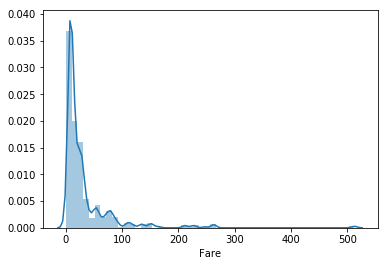

In [15]:
import seaborn as sns
%matplotlib inline

sns.distplot(df['Fare'])

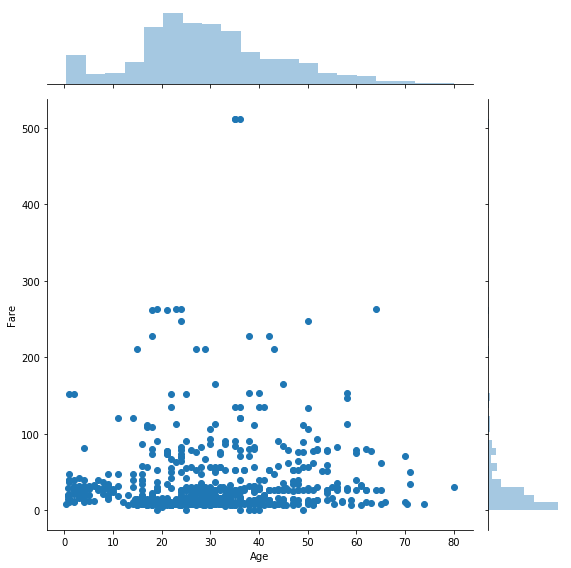

In [16]:
sns.jointplot(x='Age',
              y='Fare',
              data=df,
              height=8)

La funzione *stripplot* è uno *scatterplot* (realizzato qui sopra con la funzione *jointplot*) in cui uno degli attributi è categorico.

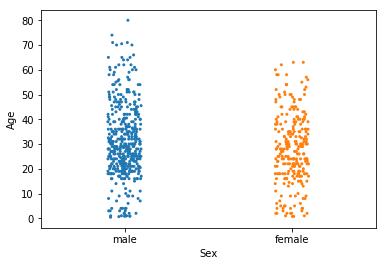

In [17]:
sns.stripplot(x='Sex',
              y='Age',
              data=df,
              size=3)

Attraverso l'argomento *hue*, le funzioni di seaborn permettono di "colorare" i grafici in base al valore di una feature categorica.

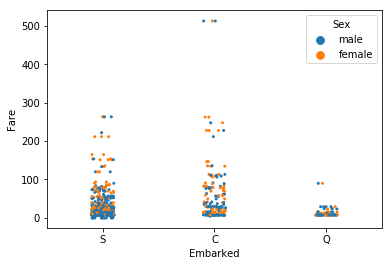

In [18]:
sns.stripplot(x='Embarked',
              y='Fare',
              hue='Sex',
              data=df,
              size=3)

La funzione *catplot* realizza uno scatterplot *condizionale*.

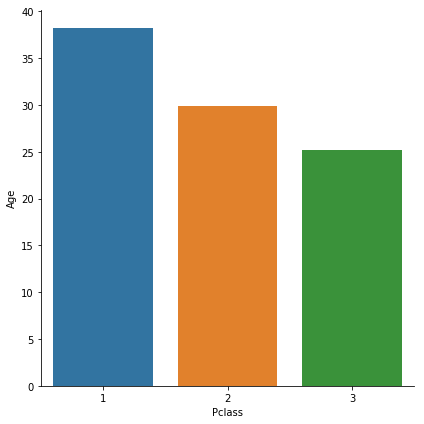

In [19]:
sns.catplot('Pclass',
            'Age',
            data=df,
            kind='bar',
            ci=False,
            height=6)

Per esempio, nel grafico qui sopra vediamo l'età media dei passeggeri in ogni classe.

**Cosa otteniamo se utilizziamo come ordinata la colonna *Survived*?**

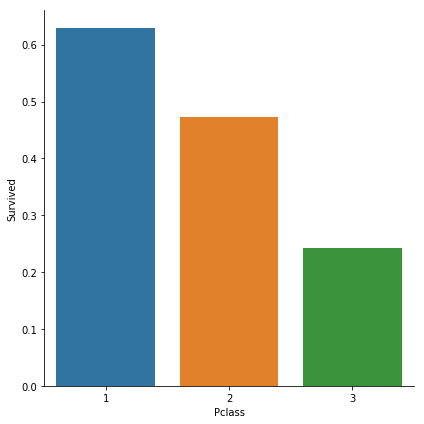

In [21]:
sns.catplot('Pclass',
            'Survived',
            data=df,
            kind='bar',
            ci=False,
            height=6)

Anche questo tipo di grafico può essere colorato con hue.

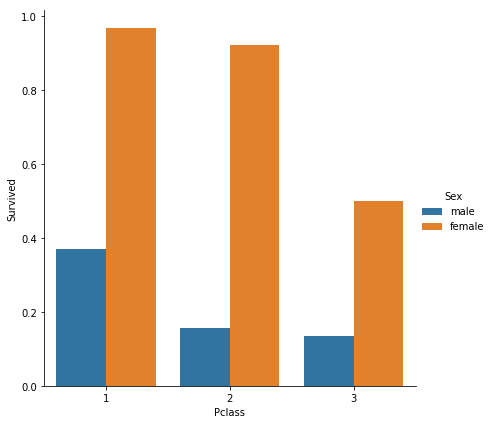

In [22]:
sns.catplot('Pclass',
            'Survived',
            hue='Sex',
            data=df,
            kind='bar',
            ci=False,            
            height=6)

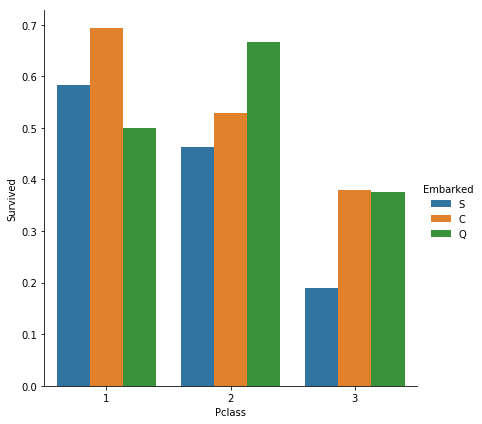

In [23]:
sns.catplot('Pclass',
            'Survived',
            hue='Embarked',
            data=df,
            kind='bar',
            ci=False,
            height=6)

La funzione *pairplot* mostra gli scatterplot di tutte le Series di un DataFrame.

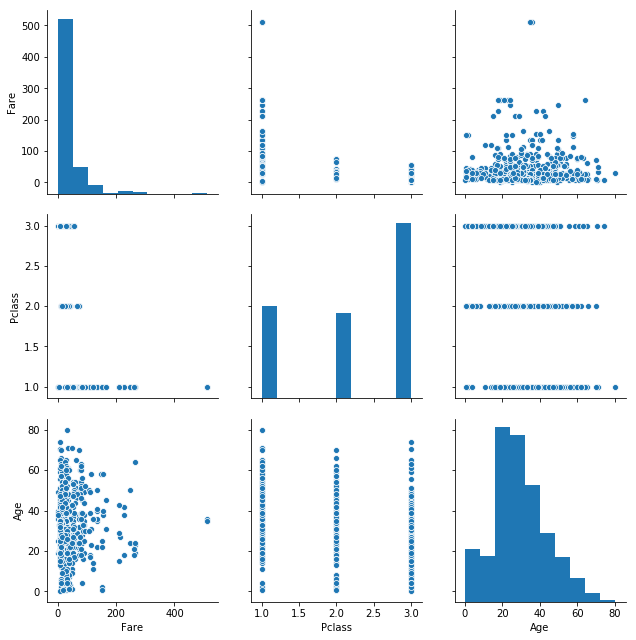

In [28]:
sns.pairplot(df[['Fare', 'Pclass', 'Age']].dropna(),
             height=3)

Anche pairplot può essere colorata in base ad una variabile categorica.

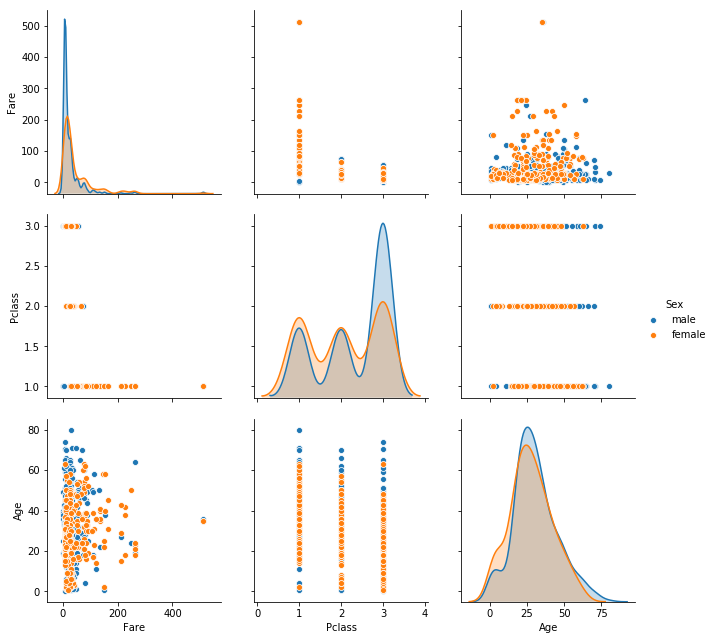

In [29]:
sns.pairplot(df[['Fare', 'Pclass', 'Age', 'Sex']].dropna(),
             hue='Sex',
             height=3)

Anche Pandas offre qualche strumento statistico. Le funzioni *describe* e *value_counts*, già viste in precedenza, restituiscono rispettivamente le statistiche di una Series e l'istogramma di occorrenze dei suoi valori.

In [39]:
df.Age.describe()#sintassi alternativa per accesso nominale a colonna

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

La funzione *groupby*
---

Supponiamo di voler predire se un passeggero sopravviverà o meno. In altre parole, la colonna Survived diventa il nostro target.

Per prima cosa, abbiamo bisogno di una *baseline*. Costruiamo il modello $M_{gender}$, che assegna 1 alle donne (ipotizzando quindi che sopravvivano) e 0 agli uomini. **Quanto sarà accurato il modello $M_{gender}$?**

Contiamo per prima cosa i maschi e le femmine, e vediamo qual è la probabilità di sopravvivenza dei due gruppi.

In [35]:
df.shape

(891, 10)

In [36]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
df.Sex.value_counts() / df.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

La funzione *groupby* serve per organizzare un DataFrame in gruppi. Nell'esempio qui sotto, la funzione
- raggruppa i dati in base alla colonna *Sex*
- estrae, da entrambi i gruppi (femmine e maschi), la colonna *Survived*, sotto forma di Series
- per ognuna delle Series (quindi i valori di sopravvivenza delle femmine e dei maschi), esegue un'operazione aggregata, in questo caso *mean*.

In questo modo otteniamo la probabilità di sopravvivenza per le femmine e i maschi.

In [40]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

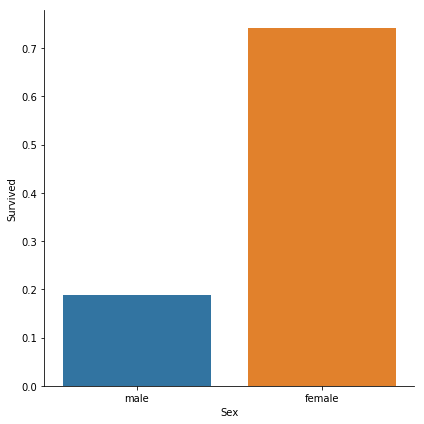

In [41]:
sns.catplot('Sex',
            'Survived',
            data=df,
            kind='bar',
            ci=False,
            height=6)

E' possibile utilizzare anche più colonne per la costruzione dei gruppi.

In [42]:
df.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

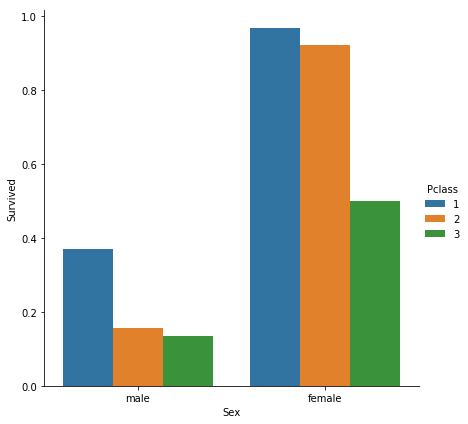

In [43]:
sns.catplot('Sex',
            'Survived',
            hue='Pclass',
            data=df,
            kind='bar',
            ci=False,
            height=6)

### *Esercizio 1*

Calcolare il prezzo medio del biglietto per ogni classe.

In [44]:
#FILL ME

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Codifica *one-hot*
---

I valori di una feature categorica *nominale* (per esempio, il gruppo sanguigno o l'etnia) non possono essere semplicementi mappati su numeri interi.

**Quali sono le feature nominali di questo dataset?**

Per evitare di creare relazioni spurie tra i valori di una variabile nominale, occorre codificarla in modo *one-hot*. In Pandas, questo si ottiene con la funzione *get_dummies*. Applichiamola sulla feature *Embarked*.

In [45]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
df = pd.get_dummies(df,
                    prefix=['Emb'],#nuovi prefissi comuni
                    columns=['Embarked'])#lista colonne da codificare

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_C,Emb_Q,Emb_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0,0,1


La funzione get_dummies ha trasformato la colonna Embarked in tante colonne (booleane) quanti sono i suoi valori.

In [47]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Emb_C', 'Emb_Q', 'Emb_S'],
      dtype='object')

Costruzione di nuove colonne
---

Pandas può essere utilizzata per costruire nuove feature (quindi colonne, Series) a partire da quelle esistenti. Ecco alcuni esempi.

In [48]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].apply(lambda name: name[name.index(',') + 2 : name.index('.')])

In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_C,Emb_Q,Emb_S,FamilySize,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0,0,1,2,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,0,0,2,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,0,0,1,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0,0,1,2,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0,0,1,1,Mr


Qui sopra, la funzione *lambda* specificata dentro *apply* viene applicata a tutti gli elementi della Series *Name*.

### *Esercizio 2*

Costruire la colonna *LastName* a partire dal nome dei passeggeri.

In [ ]:
#FILL ME

### *Esercizio 3*

La contessa è sopravvissuta?

In [52]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Don               1
Ms                1
Sir               1
Jonkheer          1
Mme               1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [ ]:
#FILL ME

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>